<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Basic Bivariate Statistics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Data Analytics: Basic Bivariate Statistics

Here's a demonstration of calculation of bivariate statistics in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics and Geostatistics at the Cockrell School of Engineering and Jackson School of Goesciences at the University of Texas at Austin.  

We will cover the following statistics:

#### Bivariate Statistics
* Covariances
* Pearson Product Momment Correlation Coefficient
* Spearman Rank Correlation Coefficient

I have a lecture on these bivariate statistics available on [YouTube](https://www.youtube.com/watch?v=wZwYEDqB4A4&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=21&t=0s).   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  The dataset is available on my GitHub account in my GeoDataSets repository at:

* Tabular data - [2D_MV_200wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/2D_MV_200wells.csv)

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [54]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # plotting
from scipy.stats import pearsonr          # Pearson product moment correlation
from scipy.stats import spearmanr         # spearman rank correlation

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). Set this to your working directory, with the above mentioned data file.

In [55]:
os.chdir("d:/PGE383")                     # set the working directory

#### Loading Data 

Let's load the provided multivariate, spatial dataset.  '2D_MV_200wells.csv' is available at https://github.com/GeostatsGuy/GeoDataSets.  It is a comma delimited file with X and Y coordinates,facies 1 and 2 (1 is sandstone and 2 interbedded sand and mudstone), porosity (fraction), permeability (mDarcy) and acoustic impedance (kg/m2s*10^6). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).

In [56]:
df = pd.read_csv("2D_MV_200wells.csv")                      # read a .csv file in as a DataFrame
#print(df.iloc[0:5,:])                                       # display first 4 samples in the table as a preview
df.head()                                                   # we could also use this command for a table preview 

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


Let's extract two of the features, porosity, into a 1D ndarray and do our statistics on porosity.

* then we can use NumPy's statistics methods

In [57]:
por = df['porosity'].values
perm = df['permeability'].values

Let's take a quick look at the data. It is always a good idea to visualize data before we calculate statistics.

* check for linearity with respect to the related assumptions for each measure

* chech for outliers

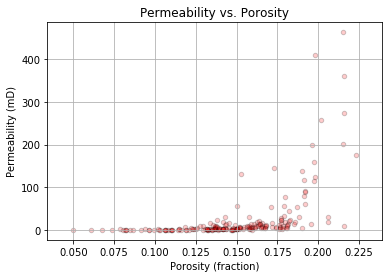

In [70]:
plt.scatter(por,perm,c = 'red',alpha=0.2, s = 20,edgecolors = 'black')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Permeability (mD)')
plt.title('Permeability vs. Porosity'); plt.grid()

Now let's go through all the bivariate statistics listed above one-by-one.

#### Bivariate Statistics

We will cover a variety of measures of correlation.

##### Covariance

\begin{equation}
C_{X,Y} = \frac{\sum^n_{i=1}(x_i - \overline{x})(y_i - \overline{y})}{(n-1)}
\end{equation}

We can use Numpy ot calculate the covariance matrix including:

* sample variances on the diagonal
* sample covariance on the off-diagonal 

We must put the two features into an $2 \times n$ array.

In [58]:
cov_matrix = np.cov(np.array([por,perm]))

print('Porosity sample variance is ' + str(round(cov_matrix[0,0],8)))
print('Permeability sample variance is ' + str(round(cov_matrix[1,1],2)))
print('Sample covariance of permeability and porosity is ' + str(round(cov_matrix[0,1],2)))

Porosity sample variance is 0.00108557
Permeability sample variance is 4156.4
Sample covariance of permeability and porosity is 1.07


##### Pearson Product Moment Correlation Coefficient

\begin{equation}
C_{X,Y} = \frac{\sum^n_{i=1}(x_i - \overline{x})(y_i - \overline{y})}{(n-1)\sigma_X \sigma_Y}
\end{equation}

We can use Numpy ot calculate the correlation matrix including:

* sample variances on the diagonal
* sample correlation on the off-diagonal 

We must put the two features into an $2 \times n$ array.

In [59]:
corr_matrix = np.corrcoef(np.array([por,perm]))

print('Standardized porosity sample variance is ' + str(round(corr_matrix[0,0],8)))
print('Standardized permeability sample variance is ' + str(round(corr_matrix[1,1],2)))
print('Sample Pearson product moment correlation coefficient of permeability and porosity is ' + str(round(corr_matrix[0,1],2)))

Standardized porosity sample variance is 1.0
Standardized permeability sample variance is 1.0
Sample Pearson product moment correlation coefficient of permeability and porosity is 0.51


We can use Scipy to calculate the product moment correlation between 2 1D, paired arrays. 

* we also get the p-value for the significance of the measure.

In [60]:
corr, corr_p_value = pearsonr(por,perm)

print('Sample Pearson product moment correlation coefficient of permeability and porosity is ' + str(round(corr,2)))
print('Sample Pearson product moment correlation coefficient of permeability and porosity p-value is ' + str(round(corr_p_value,4)))

Sample Pearson product moment correlation coefficient of permeability and porosity is 0.51
Sample Pearson product moment correlation coefficient of permeability and porosity p-value is 0.0


##### Spearman Rank Correlation Coefficient

\begin{equation}
\rho_{R_X,R_Y} = \frac{\sum^n_{i=1}(R_{x_i} - \overline{R_x})(R_{y_i} - \overline{R_y})}{(n-1)\sigma_{R_X} \sigma_{R_Y}}
\end{equation}

We can use Scipy to calculate the rank correlation between 2 1D, paired arrays. 

* we also get the p-value for the significance of the measure.

In [62]:
rank_corr = spearmanr(por,perm)[0]
rank_corr_p_value = spearmanr(por,perm)[1]

print('Sample Spearman rank correlation coefficient of permeability and porosity is ' + str(round(rank_corr,2)))
print('Sample Spearman rank correlation coefficient of permeability and porosity p-value is ' + str(round(rank_corr_p_value,4)))

Sample Spearman rank correlation coefficient of permeability and porosity is 0.82
Sample Spearman rank correlation coefficient of permeability and porosity p-value is 0.0


#### Comments

This was a basic demonstration of bivariate statistics in Python.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
